In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

In [25]:
df = pd.read_csv('data.csv')
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
39,855138,M,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,...,26.02,107.30,740.4,0.1610,0.4225,0.50300,0.22580,0.2807,0.10710,NaN
351,899667,M,15.75,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,...,24.17,119.40,915.3,0.1550,0.5046,0.68720,0.21350,0.4245,0.10500,NaN
123,865432,B,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,...,15.98,102.80,745.5,0.1313,0.1788,0.25600,0.12210,0.2889,0.08006,NaN
51,857373,B,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,...,23.19,96.08,656.7,0.1089,0.1582,0.10500,0.08586,0.2346,0.08025,NaN
150,871001501,B,13.00,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,...,24.11,90.82,616.7,0.1297,0.1105,0.08112,0.06296,0.3196,0.06435,NaN


In [26]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**REMOVING UNNAMED COLUMN**

In [27]:
df.drop(columns='Unnamed: 32', axis = 1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**ID COLUMN IS CATEGORICAL, NOMINAL VARIABLE. IT COULD NOT HELP FOR ANALYSIS.**
**DIAGNOSIS COLUMN (OUTPUT) IS CATEGORICAL COLUMN AND ALL INPUTS COLUMNS NOW ARE NUMERICAL**

In [29]:
df.drop(columns='id', axis=1, inplace=True)

**ENSURING NO MISSING VALUES IN DATA**

In [30]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [31]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [32]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**ENCODING THE TARGET COLUMN**

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labels = le.fit_transform(df['diagnosis'])

df['target'] = labels

df.drop(columns='diagnosis', axis=1, inplace=True)


**VISUALIZING THE TARGET VALUES**

<AxesSubplot:xlabel='target', ylabel='count'>

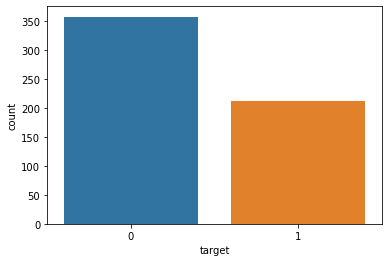

In [35]:
sns.countplot(x='target', data=df)

In [39]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'target'],
      dtype='object')

In [45]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

# **CHECKING MODEL PERFORMANCES USING CROSS VAL SCORE**

In [53]:
from sklearn.model_selection import cross_val_score

**LOGISTIC REGRESSION**

In [65]:
scores_logistic_test = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_test, y_test,cv=5)
np.average(scores_logistic_test)

0.9826086956521738

In [66]:
scores_logistic_train = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, y_train,cv=5)
np.average(scores_logistic_train)

0.9714285714285715

**SUPPORT VECTOR MACHINE**

In [67]:
scores_svm_test = cross_val_score(SVC(gamma='auto'), X_test, y_test,cv=5)
np.average(scores_svm_test)

0.9470355731225297

In [68]:
scores_svm_train = cross_val_score(SVC(gamma='auto'), X_train, y_train,cv=5)
np.average(scores_svm_train)

0.9758241758241759

**RANDOM FOREST CLASSIFIER**


**TESTING DATA**

In [83]:
scores_svm_random_test = cross_val_score(RandomForestClassifier(n_estimators=5),X_test, y_test,cv=5)
np.average(scores_svm_random_test)

0.9296442687747035

In [84]:
scores_svm_random_test = cross_val_score(RandomForestClassifier(n_estimators=10),X_test, y_test,cv=5)
np.average(scores_svm_random_test)

0.9565217391304348

In [85]:
scores_svm_random_test = cross_val_score(RandomForestClassifier(n_estimators=20),X_test, y_test,cv=5)
np.average(scores_svm_random_test)

0.964822134387352

**TRAINING DATA**

In [87]:
scores_svm_random_train = cross_val_score(RandomForestClassifier(n_estimators=5),X_train, y_train,cv=5)
np.average(scores_svm_random_train)

0.9560439560439562

In [88]:
scores_svm_random_train = cross_val_score(RandomForestClassifier(n_estimators=10),X_train, y_train,cv=5)
np.average(scores_svm_random_train)

0.9560439560439562

In [89]:
scores_svm_random_train = cross_val_score(RandomForestClassifier(n_estimators=20),X_train, y_train,cv=5)
np.average(scores_svm_random_train)

0.9538461538461538

**NAIVE BAYES**

In [91]:
scores_naive_test = cross_val_score(BernoulliNB(alpha = 1, fit_prior = 'True'), X_test, y_test,cv=5)
np.average(scores_naive_test)

0.9391304347826086

In [92]:
scores_naive_train = cross_val_score(BernoulliNB(alpha = 1, fit_prior = 'True'),X_train, y_train,cv=5)
np.average(scores_naive_train)

0.9318681318681319

# **HYPER PARAMETER TUNING OF DIFFERENT MODELS USING GRIDSEARCHCV**

In [95]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes': {
        'model': BernoulliNB(),
        'params' : {
            'alpha': [0,0.5,1],
            'fit_prior': ['True','False']
        }  
    }
}

In [96]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\pavul\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\pavul\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\pavul\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\pavul\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\pavul\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\pavul\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting a

,model,best_score,best_params
0,svm,0.975824,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.951648,{'n_estimators': 10}
2,logistic_regression,0.973626,{'C': 5}
3,naive_bayes,0.931868,"{'alpha': 0, 'fit_prior': 'True'}"
